In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('Final.csv')
# Assuming 'data' is your DataFrame
X = data[['Age', 'Gender', 'Skin Type', 'Acne', 'Aging', 'Dark spots', 'Dryness', 'Uneven']]
y = data['Product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model with hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg_model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best parameters
best_logreg_model = LogisticRegression(**best_params, random_state=42)
best_logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.6333333333333333
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           3       0.38      0.50      0.43         6
           4       0.71      1.00      0.83         5
           5       0.60      0.75      0.67         8
           6       0.78      1.00      0.88         7
           7       0.67      0.40      0.50         5
           8       0.60      0.75      0.67         4
           9       0.00      0.00      0.00         7
          10       0.43      0.50      0.46         6

    accuracy                           0.63        60
   macro avg       0.56      0.63      0.58        60
weighted avg       0.59      0.63      0.60        60



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy: 0.6333333333333333
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           3       0.38      0.50      0.43         6
           4       0.71      1.00      0.83         5
           5       0.60      0.75      0.67         8
           6       0.78      1.00      0.88         7
           7       0.67      0.40      0.50         5
           8       0.60      0.75      0.67         4
           9       0.00      0.00      0.00         7
          10       0.43      0.50      0.46         6

    accuracy                           0.63        60
   macro avg       0.56      0.63      0.58        60
weighted avg       0.59      0.63      0.60        60

Confusion Matrix:
[[9 1 0 1 0 0 0 0 1]
 [0 3 2 0 0 0 0 1 0]
 [0 0 5 0 0 0 0 0 0]
 [0 2 0 6 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0]
 [0 1 0 1 0 2 1 0 0]
 [0 0 0 0 0 1 3 0 0]
 [1 1 0 2 0 0 0 0 3]
 [0 0 0

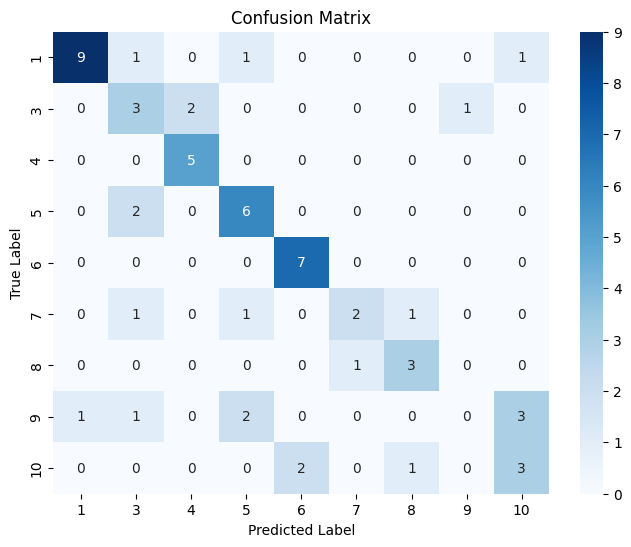

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



# Train a Logistic Regression model with hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logreg_model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best parameters
best_logreg_model = LogisticRegression(**best_params, random_state=42)
best_logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap for graphical representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_logreg_model.classes_, yticklabels=best_logreg_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
